# Exploring the demographic of OkCupid Data App User Profiles
Truong Pham Nguyen

Sep 22, 2022

In [251]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import re
import math as mth
import sys
sys.path.insert(0, '/Users/kudo/DAI-Military/assignments/midterm_project/daimil-midterm-project/src')
from clean_text import remove_punctuation
from clean_text import remove_stopwords
from word_count import count

In [252]:
# Read and save dataset into 
cupid_df = pd.read_csv("../data/okcupid_profiles.csv")
# Check the data
cupid_df.head()
# Sampling the rows
cupid_df.sample(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
20097,30,single,m,straight,athletic,mostly anything,socially,never,working on ph.d program,white,...,"i'm a french-american, born in france and rais...","i'm still a student, working on my phd in bioe...","making other people laugh, though it may be di...",NaN,"books: la sombra del viento, huckleberry finn,...",in no particular order... delicious food - i ...,NaN,"out with friends, at a bar, at the movies, boa...",i currently share my bed with two stuffed peng...,NaN
2976,30,single,m,straight,skinny,mostly anything,socially,sometimes,graduated from college/university,asian,...,"i would describe myself as fun, easygoing, occ...",i plan on attending graduate school in the nea...,organizing things and time management.,i'm not sure.,"classic rock, the beatles. cooking thai food, ...",i'm not sure.,"school, work, career plans, but i'd like to to...","watching a movie, reading, playing video games.",well on a typical friday i'm often either watc...,"if you think i'm cute, and would like to get t..."
18414,32,single,m,straight,fit,mostly anything,often,never,graduated from college/university,"black, pacific islander",...,i would like to think i am a balance of this a...,breaking all the rules and never being mediocr...,whatever i put my mind too.. cultivating relat...,my devilish grin...;) or my hair and my smile....,books: right know the compound effect by darre...,air-trees-food- water- whiskey/scotch/rye fami...,the next boys trip! 2 weeks in alaska... how t...,"snuggled on the couch with my girls,watching n...",i tend to like my dogs more than i like people...,you read my whole profile. you love new advent...


In [253]:
# Check dataset data types
cupid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [254]:
# Duplicated rows
cupid_df.duplicated().sum()

0

In [255]:
cupid_df.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

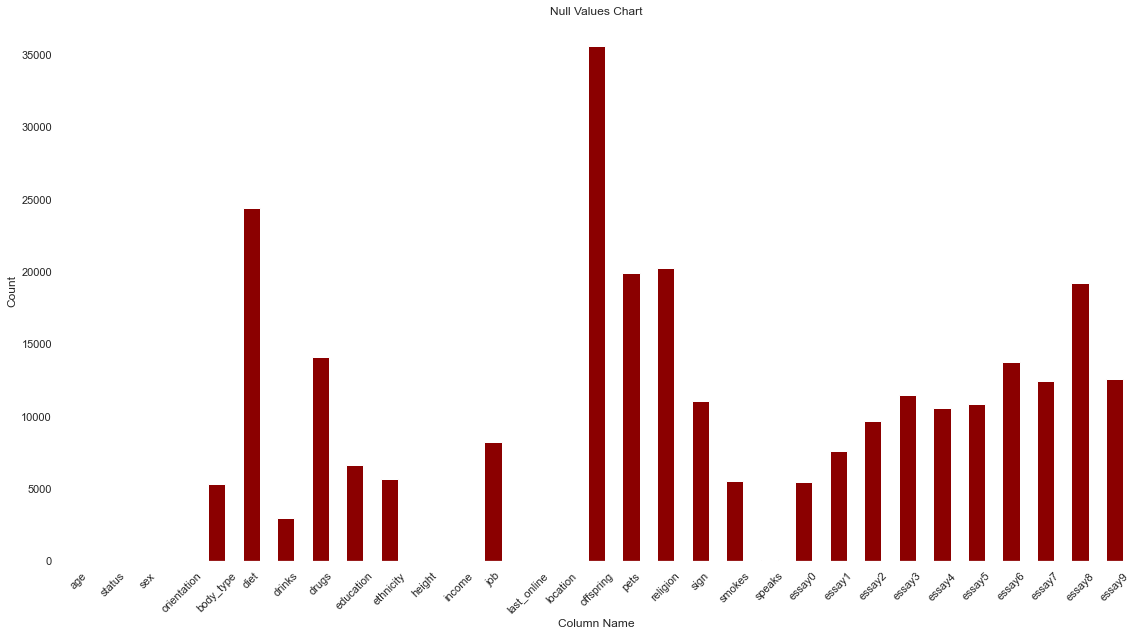

In [302]:
# Null values across columns
# cupid_df.isnull().sum()
# fig, ax = plt.subplots()
# plt.title('Null Values Chart')
# plt.xlabel()
# plt.ylabel()
# plt.legend()
# plt.figure(figsize=(16, 9))
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
cupid_df.isnull().sum().plot(   kind='bar',
                                figsize=(16, 9),
                                title='Null Values Chart',
                                xlabel = 'Column Name',
                                ylabel = 'Count',
                                color = 'darkred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../img/null_valuess.png',bbox_inches='tight')

In [257]:
cupid_df['income'].value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

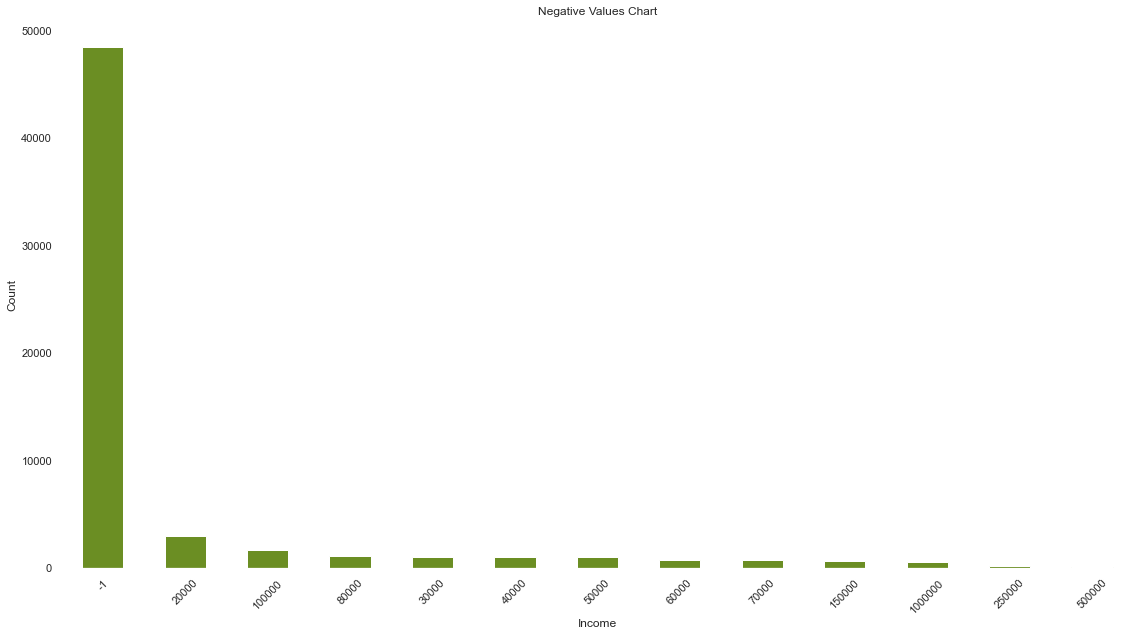

In [258]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
cupid_df['income'].value_counts().plot(         kind='bar',
                                                figsize=(16, 9),
                                                title='Negative Values Chart',
                                                xlabel = 'Income',
                                                ylabel = 'Count',
                                                color = 'olivedrab')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../img/negative_income.png',bbox_inches='tight')

In [259]:
# Describing the data
cupid_df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [260]:
# Count the number of unique values
cupid_df.nunique()

age               54
status             5
sex                2
orientation        3
body_type         12
diet              18
drinks             6
drugs              3
education         32
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
pets              15
religion          45
sign              48
smokes             5
speaks          7647
essay0         54347
essay1         51516
essay2         48625
essay3         43520
essay4         49257
essay5         48961
essay6         43583
essay7         45548
essay8         39323
essay9         45440
dtype: int64

In [261]:
# Seeing/counting all the labels
for c in cupid_df.columns:    
    print (f"----< {c} >----")
    print(cupid_df[c].value_counts())

----< age >----
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64
----< status >----
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64
----< sex >----
m    35829
f    24117
Name: sex, dtype: int64
----< orientation >----
straight    51606
gay          5573
bisexual     2767
Name: 

In [262]:
# Accounting for number of unique types of each categorical columns
# This unq_val_count Series will be used for String look up through <essayX> columns
unq_val_count={c:pd.DataFrame(cupid_df[c].value_counts()) for c in cupid_df.columns}
unq_val_count = pd.Series(unq_val_count)
unq_val_count

age                  age
26   3724
27   3685
28   3583
25   3...
status                         status
single           55697
...
sex                                        sex
m  35829
f  24117
orientation              orientation
straight        51606
ga...
body_type                      body_type
average             ...
diet                                 diet
mostly anything    ...
drinks                      drinks
socially      41780
rarely...
drugs                     drugs
never      37724
sometimes   ...
education                                         education
g...
ethnicity                                                    ...
height               height
70.0    6074
68.0    5449
67.0   ...
income                   income
-1         48442
 20000      ...
job                                                job
other ...
last_online                      last_online
2012-06-29-22-56...
location                                       location
san f...
offspring                

In [263]:
# Revised education column, using custom created csv 
# through self labeling using the most conservative judgement
edu_cat_df = pd.read_csv("../data/education_category_revised.csv")
edu_cat_df
edu_cat_df.sort_values('revised')

,original,revised
0,graduated from college/university,Associate's Degree
11,college/university,Associate's Degree
4,graduated from two-year college,Associate's Degree
17,two-year college,Associate's Degree
29,dropped out of law school,Bachelor's Degree
16,working on law school,Bachelor's Degree
20,dropped out of masters program,Bachelor's Degree
18,working on med school,Bachelor's Degree
30,dropped out of med school,Bachelor's Degree
3,working on masters program,Bachelor's Degree


In [264]:
# Prepping data to use with .replace()
edu_cat_df = edu_cat_df.set_index('original')
edu_cat_dict = edu_cat_df.to_dict()
edu_cat_dict


{'revised': {'graduated from college/university': "Associate's Degree",
  'graduated from masters program': "Master's Degree",
  'working on college/university': 'Some College',
  'working on masters program': "Bachelor's Degree",
  'graduated from two-year college': "Associate's Degree",
  'graduated from high school': 'up to High school',
  'graduated from ph.d program': 'Doctorate Degree',
  'graduated from law school': 'Law degree',
  'working on two-year college': 'Some College',
  'dropped out of college/university': 'Some College',
  'working on ph.d program': "Master's Degree",
  'college/university': "Associate's Degree",
  'graduated from space camp': 'up to High school',
  'dropped out of space camp': 'up to High school',
  'graduated from med school': 'Medical Degree',
  'working on space camp': 'up to High school',
  'working on law school': "Bachelor's Degree",
  'two-year college': "Associate's Degree",
  'working on med school': "Bachelor's Degree",
  'dropped out of tw

In [265]:
# Accessing nested dictionary
edu_cat_dict = edu_cat_dict['revised']

In [266]:
cupid_df['ethnicity'].value_counts().to_dict()

{'white': 32831,
 'asian': 6134,
 'hispanic / latin': 2823,
 'black': 2008,
 'other': 1706,
 'hispanic / latin, white': 1301,
 'indian': 1077,
 'asian, white': 811,
 'white, other': 641,
 'pacific islander': 432,
 'asian, pacific islander': 395,
 'native american, white': 338,
 'middle eastern': 329,
 'middle eastern, white': 300,
 'black, white': 298,
 'pacific islander, white': 156,
 'hispanic / latin, other': 138,
 'black, other': 133,
 'black, hispanic / latin': 119,
 'hispanic / latin, white, other': 117,
 'black, native american, white': 110,
 'black, native american': 100,
 'asian, other': 95,
 'asian, hispanic / latin': 88,
 'native american, hispanic / latin, white': 87,
 'native american, hispanic / latin': 73,
 'asian, white, other': 69,
 'native american': 67,
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other': 66,
 'asian, black': 59,
 'pacific islander, hispanic / latin': 57,
 'asian, pacific islander, white': 55,
 '

In [267]:
# Revising education column, shortens amount of labels
cupid_revised_df = cupid_df.replace({"education": edu_cat_dict})

# Replace -1 with nan values in "income" column
cupid_revised_df.loc[cupid_revised_df['income'] < 0, 'income'] = np.nan

# Using astype(str) to deal with nan values. nan values when combining with str will return a nan, therefore spoil the integrity of data
cupid_revised_df['all_essays'] = cupid_revised_df['essay0'].astype(str) + cupid_revised_df['essay1'].astype(str) + cupid_revised_df['essay2'].astype(str) + cupid_revised_df['essay3'].astype(str) + cupid_revised_df['essay4'].astype(str) + cupid_revised_df['essay5'].astype(str) + cupid_revised_df['essay6'].astype(str) + cupid_revised_df['essay7'].astype(str) + cupid_revised_df['essay8'].astype(str) + cupid_revised_df['essay9'].astype(str)

# Removing locations and last_online column
cupid_revised_df = cupid_revised_df.drop(columns=['location','last_online'])

# Dropping essay0, essay1, essay2 ... etc.
cupid_revised_df = cupid_revised_df.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'])

# Adding column words counting how many words a person typing, nan consider one word
cupid_revised_df['words'] = cupid_revised_df['all_essays'].str.split().str.len()

# only taking 12 characters from each row of ethnicity column
# simplifying the ethinicity column
cupid_revised_df['ethnicity'] = cupid_revised_df['ethnicity'].str[:12]

cupid_revised_df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,offspring,pets,religion,sign,smokes,speaks,all_essays,words
0,22,single,m,straight,a little extra,strictly anything,socially,never,Some College,"asian, white",...,NaN,transportation,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,441
1,35,single,m,straight,average,mostly other,often,sometimes,up to High school,white,...,80000.0,hospitality / travel,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,263
2,38,available,m,straight,thin,anything,socially,NaN,Master's Degree,NaN,...,NaN,NaN,NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...",848
3,23,single,m,straight,thin,vegetarian,socially,NaN,Some College,white,...,20000.0,student,doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .readi...,69
4,29,single,m,straight,athletic,NaN,socially,never,Associate's Degree,"asian, black",...,NaN,artistic / musical / writer,NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,Associate's Degree,NaN,...,NaN,sales / marketing / biz dev,has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",287
59942,24,single,m,straight,fit,mostly anything,often,sometimes,Some College,"white, other",...,NaN,entertainment / media,doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),i'm nick. i never know what to write about mys...,400
59943,42,single,m,straight,average,mostly anything,not at all,never,Master's Degree,asian,...,100000.0,construction / craftsmanship,doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),"hello! i enjoy traveling, watching movies, and...",295
59944,27,single,m,straight,athletic,mostly anything,socially,often,Some College,"asian, black",...,NaN,medicine / health,"doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...","""all i have in this world are my balls and my ...",339


In [268]:
cupid_revised_df['ethnicity'].value_counts().to_dict()

{'white': 32831,
 'asian': 6134,
 'hispanic / l': 4379,
 'black': 2008,
 'other': 1706,
 'indian': 1077,
 'asian, white': 880,
 'middle easte': 811,
 'pacific isla': 717,
 'native ameri': 709,
 'white, other': 641,
 'asian, pacif': 529,
 'black, white': 347,
 'black, nativ': 347,
 'black, hispa': 173,
 'asian, hispa': 148,
 'asian, black': 144,
 'asian, middl': 139,
 'black, other': 133,
 'asian, other': 95,
 'asian, india': 78,
 'indian, whit': 60,
 'asian, nativ': 58,
 'black, india': 35,
 'indian, othe': 30,
 'black, pacif': 28,
 'indian, hisp': 16,
 'indian, paci': 13}

In [269]:
job_df = cupid_revised_df['job'].value_counts()
gender_df = cupid_revised_df['sex'].value_counts()
age_df=cupid_revised_df['age'].value_counts()
status_df=cupid_revised_df['status'].value_counts()
eudcation_df=cupid_revised_df['education'].value_counts()
orientation_df=cupid_revised_df['orientation'].value_counts()
income_df=cupid_revised_df['income'].value_counts()
ethnicity_df=cupid_revised_df['ethnicity'].value_counts()

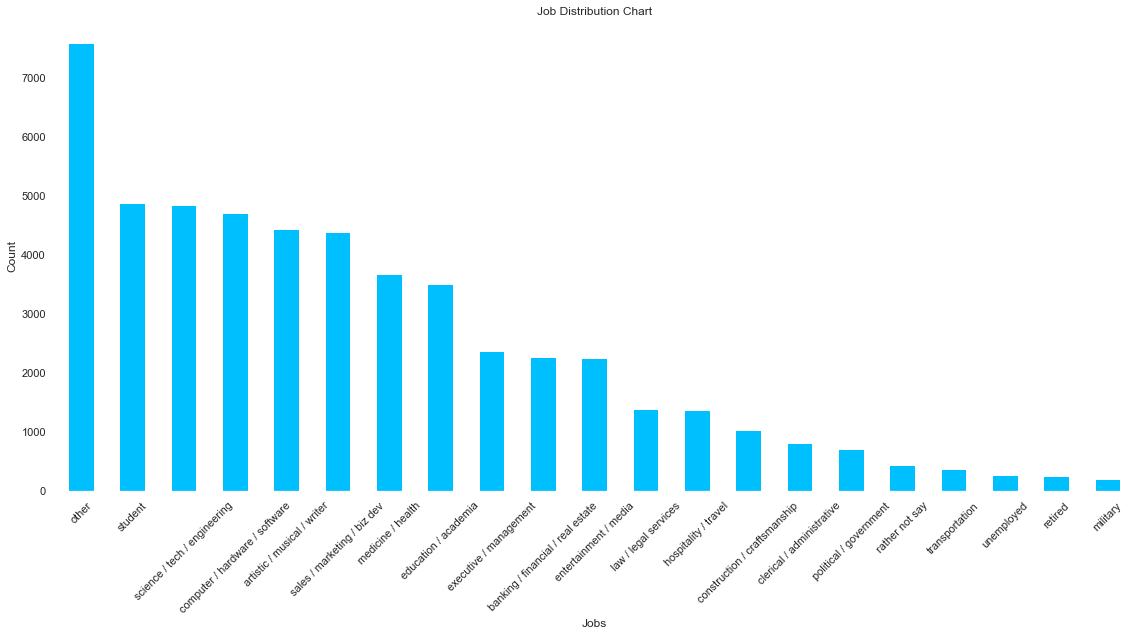

In [270]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
job_df.plot(    kind='bar',
                figsize=(16, 9),
                title='Job Distribution Chart',
                xlabel = 'Jobs',
                ylabel = 'Count',
                color = 'deepskyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../img/jobs.png')

In [271]:
m = gender_df['m']
f = gender_df['f']

gender_df['m'] = 100*m/(m+f)
gender_df['f'] = 100*f/(m+f)

gender_df

m    59.768792
f    40.231208
Name: sex, dtype: float64

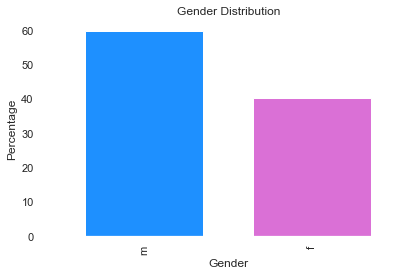

In [272]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
gender_df.plot(
    kind='bar', 
    color=['dodgerblue','orchid'],
    stacked=True,
    width=0.7)
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Gender Distribution")
plt.tight_layout()
plt.savefig("../img/gender.png")

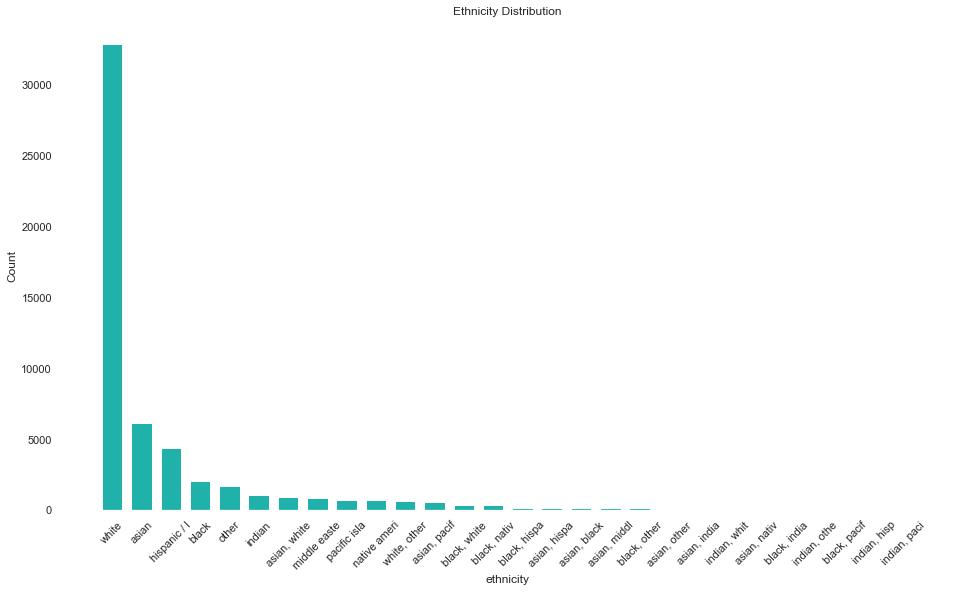

In [273]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
x = ethnicity_df.index
y = ethnicity_df.values
plt.figure(figsize=(16,9))
plt.bar(
    x, 
    y,
    color=['lightseagreen'],
    width=0.7)

plt.xlabel("ethnicity")
plt.ylabel("Count")
plt.title("Ethnicity Distribution")
plt.xticks(rotation=45)
plt.savefig("../img/ethnicity.png")

<Figure size 1152x648 with 0 Axes>

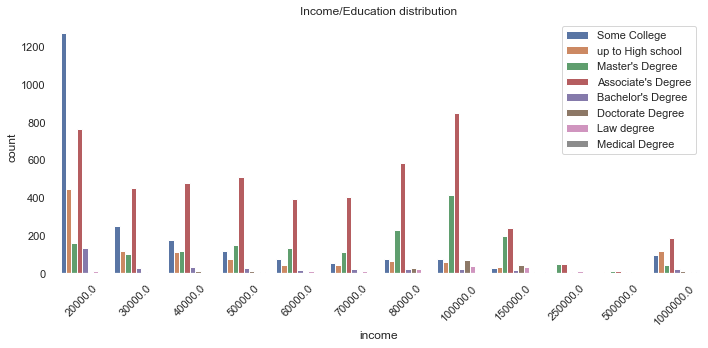

In [274]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
# ax = plt.axes()
# fig,ax = plt.subplots()
plt.figure(figsize=(16,9))
sns.catplot(
            x='income', 
            hue='education', 
            data = cupid_revised_df, 
            palette='deep', 
            kind='count',
            legend=False,
            height=5,
            aspect=2)
plt.xticks(rotation = 45)
plt.title('Income/Education distribution')
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("../img/income-education.png")
plt.show()

<Figure size 1152x648 with 0 Axes>

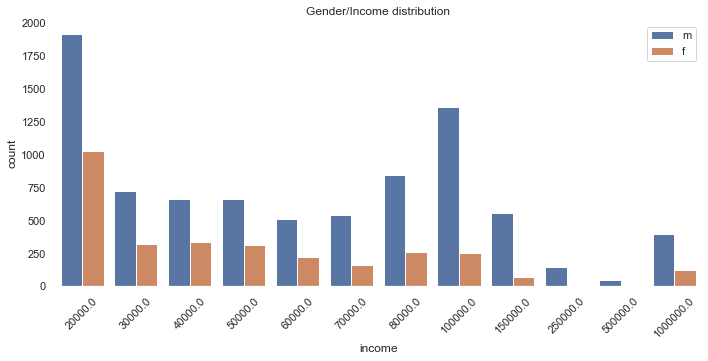

In [275]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
plt.figure(figsize=(16,9))
sns.catplot(
    x='income',
    hue='sex',  
    data = cupid_revised_df, 
    kind='count', 
    palette='deep', 
    legend=False,
    height=5,
    aspect=2)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Gender/Income distribution')
plt.savefig("../img/gender-income.png")

<Figure size 1152x648 with 0 Axes>

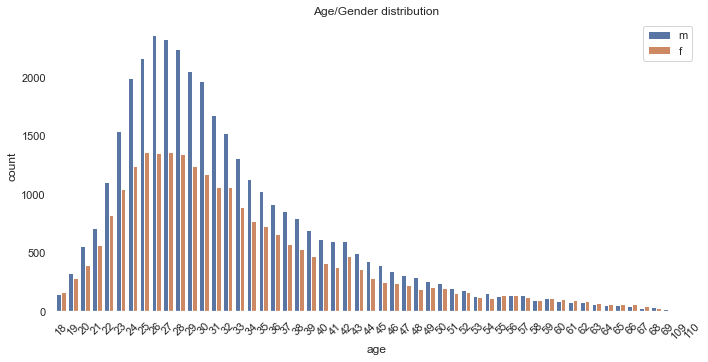

In [276]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
plt.figure(figsize=(16,9))
sns.catplot(
    x='age', 
    data = cupid_revised_df, 
    kind='count', 
    palette='deep', 
    hue='sex', 
    legend=False,
    height=5,
    aspect=2)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Age/Gender distribution')
plt.savefig("../img/gender-ages.png")


<Figure size 576x360 with 0 Axes>

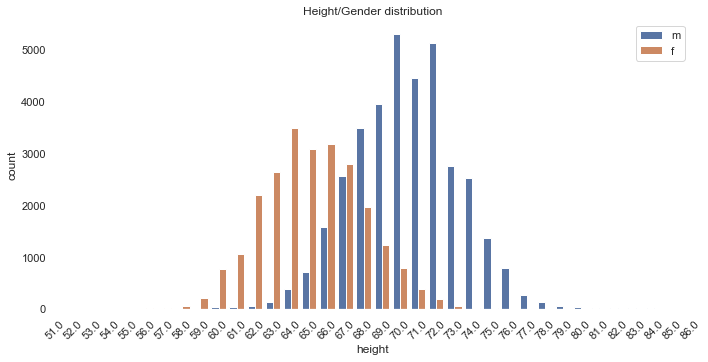

In [277]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
plt.figure(figsize=(8,5))
sns.catplot(
    x='height', 
    data = cupid_revised_df, 
    kind='count', 
    palette='deep', 
    hue='sex', 
    legend=False,
    height=5,
    aspect=2)
plt.xlim(15,50)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Height/Gender distribution')
plt.savefig("../img/gender-height.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1152x648 with 0 Axes>

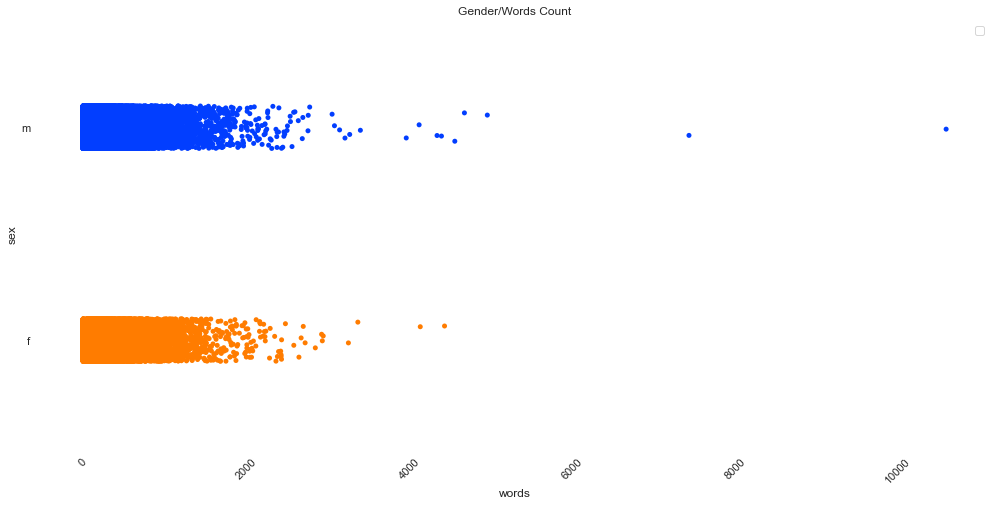

In [278]:
plt.figure(figsize=(16,9))
sns.catplot(
    x='words',
    y='sex',  
    data = cupid_revised_df, 
    palette='bright', 
    legend=False,
    height=7,
    aspect=2)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Gender/Words Count')
plt.savefig("../img/gender-words.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1152x648 with 0 Axes>

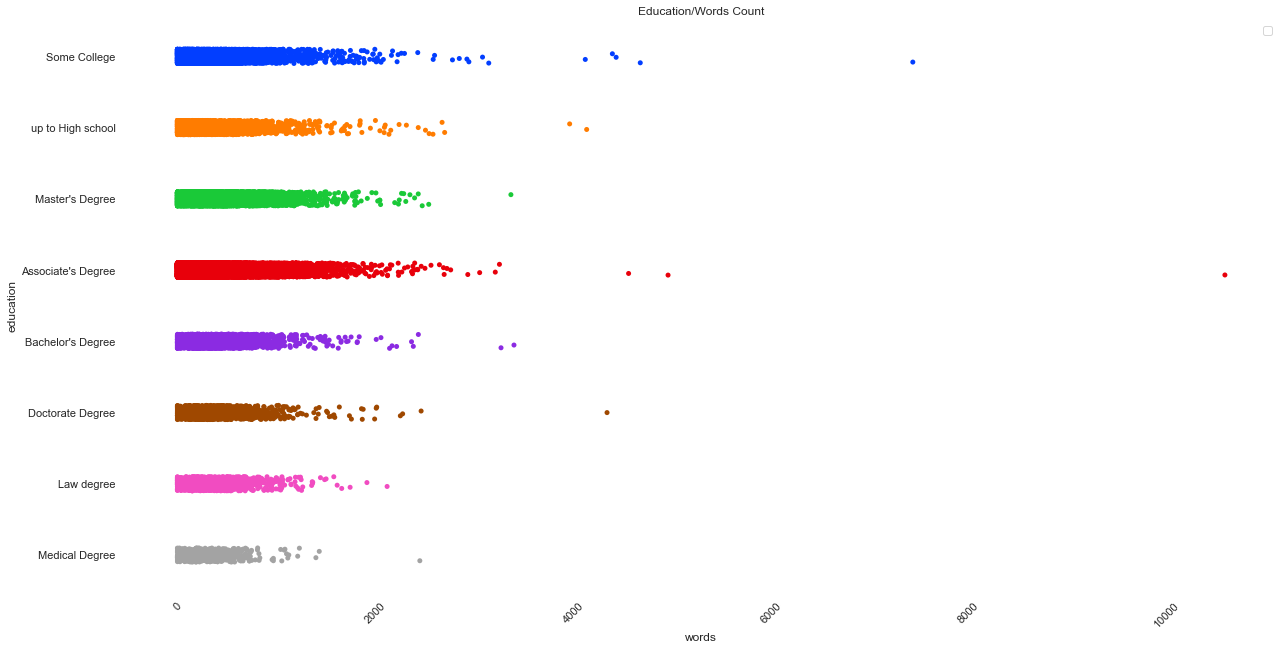

In [279]:
plt.figure(figsize=(16,9))
sns.catplot(
    x='words',
    y='education',  
    data = cupid_revised_df, 
    palette='bright', 
    legend=False,
    height=9,
    aspect=2)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Education/Words Count')
plt.savefig("../img/education-words.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1152x648 with 0 Axes>

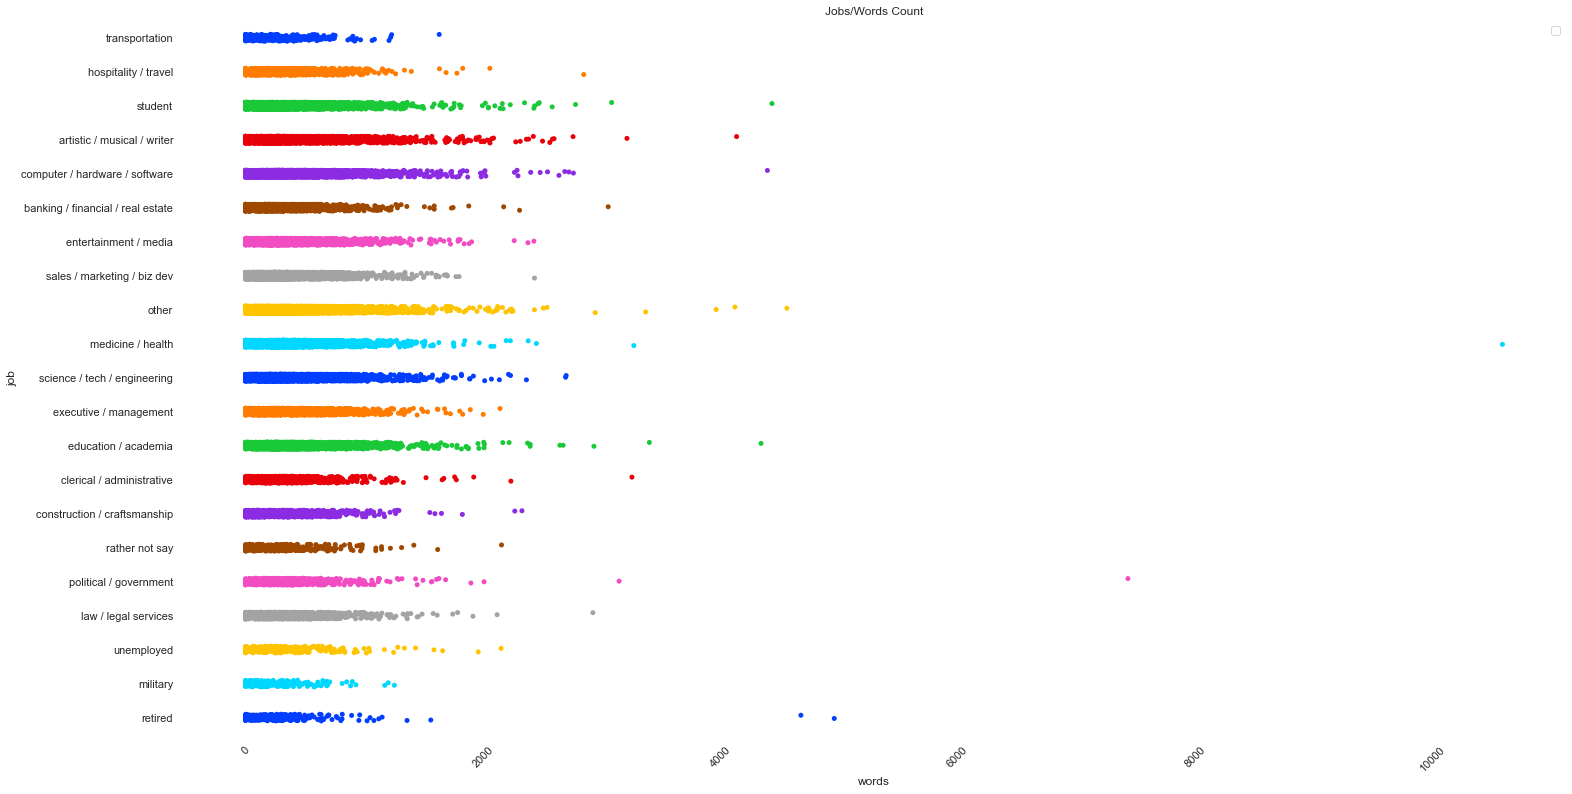

In [280]:
plt.figure(figsize=(16,9))
sns.catplot(
    x='words',
    y='job',  
    data = cupid_revised_df, 
    palette='bright', 
    legend=False,
    height=11,
    aspect=2)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Jobs/Words Count')
plt.savefig("../img/Jobs-words.png")

In [281]:
serious_astrologist_keywords = [ 'scorpio and it matters a lot',
                                'leo and it matters a lot',
                                'cancer and it matters a lot',
                                'aquarius and it matters a lot',
                                'pisces and it matters a lot',
                                'gemini and it matters a lot',
                                'libra and it matters a lot',
                                'taurus and it matters a lot',
                                'aries and it matters a lot',
                                'sagittarius and it matters a lot',
                                'capricorn and it matters a lot',
                                'virgo and it matters a lot']
cupid_revised_df[cupid_revised_df['sign'].isin(serious_astrologist_keywords)]['sign'].count()



675

In [282]:
# Picking just columns speaks
ethnicity_df = cupid_revised_df['ethnicity']
# Creating empty list to store ID of someone who speak Vietnamese
white_index = []
# Enumerate speak_df so that i store the index, row store the value for the rows
for i, row in ethnicity_df.iteritems():
    # use regualre expression to remove special character in this particular column 
    # included open/close parenthesis and comma 
    row = re.sub(r"[\(\),]","",str(row))
    # split the row into words inside list word_ls
    row_ls = row.split() 
    for word in row_ls:
        if word == 'white':
            white_index.append(i)
# print(white_index)
print(len(white_index))

34699


In [283]:
cupid_revised_df.iloc[white_index]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,offspring,pets,religion,sign,smokes,speaks,all_essays,words
0,22,single,m,straight,a little extra,strictly anything,socially,never,Some College,"asian, white",...,NaN,transportation,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,441
1,35,single,m,straight,average,mostly other,often,sometimes,up to High school,white,...,80000.0,hospitality / travel,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,263
3,23,single,m,straight,thin,vegetarian,socially,NaN,Some College,white,...,20000.0,student,doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .readi...,69
5,29,single,m,straight,average,mostly anything,socially,NaN,Associate's Degree,white,...,NaN,computer / hardware / software,"doesn't have kids, but might want them",likes cats,atheism,taurus,no,"english (fluently), chinese (okay)","i'm an australian living in san francisco, but...",402
6,32,single,f,straight,fit,strictly anything,socially,never,Associate's Degree,"white, other",...,NaN,NaN,NaN,likes dogs and likes cats,NaN,virgo,NaN,english,life is about the little things. i love to lau...,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59935,33,single,f,straight,curvy,anything,socially,never,NaN,white,...,NaN,NaN,has kids,NaN,NaN,virgo and it&rsquo;s fun to think about,when drinking,english (fluently),i am a mom first and foremost. currently separ...,201
59937,32,single,m,bisexual,thin,anything,socially,NaN,Bachelor's Degree,white,...,NaN,education / academia,NaN,NaN,judaism and laughing about it,NaN,no,"english, spanish (fluently)",a cautious photo for a cautious dude (i'm havi...,250
59939,52,single,m,straight,NaN,NaN,socially,never,Associate's Degree,white,...,NaN,executive / management,doesn't want kids,likes dogs and has cats,NaN,pisces and it&rsquo;s fun to think about,no,english (fluently),hi there and thanks for checking out my profil...,769
59942,24,single,m,straight,fit,mostly anything,often,sometimes,Some College,"white, other",...,NaN,entertainment / media,doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),i'm nick. i never know what to write about mys...,400


In [284]:
# Picking just columns speaks
ethnicity_df = cupid_revised_df['ethnicity']
# Creating empty list to store ID of someone who speak Vietnamese
asian_index = []
# Enumerate speak_df so that i store the index, row store the value for the rows
for i, row in ethnicity_df.iteritems():
    # use regualre expression to remove special character in this particular column 
    # included open/close parenthesis and comma 
    row = re.sub(r"[\(\),]","",str(row))
    # split the row into words inside list word_ls
    row_ls = row.split() 
    for word in row_ls:
        if word == 'asian':
            asian_index.append(i)
# print(asian_index)
print(len(asian_index))
asian_df = cupid_revised_df.iloc[asian_index]

8205


In [285]:
asian_df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,offspring,pets,religion,sign,smokes,speaks,all_essays,words
0,22,single,m,straight,a little extra,strictly anything,socially,never,Some College,"asian, white",...,NaN,transportation,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,441
4,29,single,m,straight,athletic,NaN,socially,never,Associate's Degree,"asian, black",...,NaN,artistic / musical / writer,NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,101
25,28,single,m,straight,fit,anything,rarely,never,Associate's Degree,"asian, white",...,NaN,medicine / health,"doesn't have kids, but wants them",has dogs,NaN,gemini and it&rsquo;s fun to think about,no,english,"hey to all, hope all is well and your having a...",857
27,22,single,m,straight,average,anything,socially,never,NaN,asian,...,NaN,other,NaN,has dogs and dislikes cats,agnosticism and laughing about it,leo and it&rsquo;s fun to think about,no,"english (fluently), other (fluently), thai (po...","i suck at these things, but here it goes. i'm ...",243
53,36,single,m,straight,athletic,NaN,socially,NaN,Associate's Degree,"asian, nativ",...,NaN,computer / hardware / software,NaN,has dogs,NaN,NaN,NaN,english,"i'm fairly new to the bay area, still explorin...",86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59910,23,single,m,gay,thin,mostly anything,socially,never,Associate's Degree,"asian, white",...,NaN,computer / hardware / software,NaN,NaN,other and laughing about it,aries but it doesn&rsquo;t matter,no,"english (fluently), french (poorly), japanese ...",another shambling college graduate looking for...,197
59920,22,single,f,straight,NaN,mostly anything,socially,sometimes,Associate's Degree,"asian, hispa",...,NaN,science / tech / engineering,doesn't have kids,likes dogs and likes cats,agnosticism,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), spanish (okay)",i'd like your finest milksteak please. and not...,180
59936,25,single,f,straight,average,mostly anything,socially,never,Associate's Degree,asian,...,NaN,other,doesn't have kids,NaN,atheism,virgo but it doesn&rsquo;t matter,no,"english (fluently), chinese (fluently)",nannannanmy infectious laugh :)nannannannannannan,4
59943,42,single,m,straight,average,mostly anything,not at all,never,Master's Degree,asian,...,100000.0,construction / craftsmanship,doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),"hello! i enjoy traveling, watching movies, and...",295


In [286]:
speak_df = cupid_revised_df['speaks']
# Creating empty list to store ID of someone who speak Vietnamese
vietnamese_index = []
# Enumerate speak_df so that i store the index, row store the value for the rows
for i, row in speak_df.iteritems():
    # use regualre expression to remove special character in this particular column 
    # included open/close parenthesis and comma 
    row = re.sub(r"[\(\),]","",str(row))
    # split the row into words inside list word_ls
    row_ls = row.split() 
    for word in row_ls:
        if word == 'vietnamese':
            vietnamese_index.append(i)
# print(vietnamese_index)

# Total people who speak Vietnamese
print(len(vietnamese_index))
vietnamese_df = cupid_revised_df.iloc[vietnamese_index]

400


In [287]:
vietnamese_df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,offspring,pets,religion,sign,smokes,speaks,all_essays,words
201,28,single,m,straight,fit,mostly anything,socially,never,Associate's Degree,asian,...,NaN,computer / hardware / software,"doesn't have kids, but might want them",likes dogs,other but not too serious about it,gemini but it doesn&rsquo;t matter,no,"english (fluently), vietnamese (fluently), c++...",socially awkward but if you give me a few drin...,256
212,41,single,m,straight,average,anything,NaN,never,Associate's Degree,asian,...,NaN,law / legal services,NaN,NaN,NaN,capricorn,no,"english, vietnamese","really, what's the point of this summary? i do...",605
881,26,single,m,straight,average,mostly anything,socially,never,Master's Degree,asian,...,NaN,banking / financial / real estate,NaN,NaN,catholicism but not too serious about it,capricorn but it doesn&rsquo;t matter,no,"english (fluently), vietnamese (fluently)",i'm a young and ambitious investment professio...,548
973,37,single,m,straight,average,NaN,socially,NaN,Associate's Degree,NaN,...,NaN,artistic / musical / writer,NaN,likes dogs,catholicism,leo and it&rsquo;s fun to think about,NaN,"english (fluently), indonesian (okay), vietnam...",need to rewrite this part of the profile. the ...,803
1120,33,single,m,straight,thin,anything,socially,sometimes,Master's Degree,white,...,NaN,artistic / musical / writer,"doesn't have kids, but might want them",NaN,atheism and laughing about it,aries and it&rsquo;s fun to think about,when drinking,"english (fluently), french (okay), spanish (ok...",i think i had previously defined myself by my ...,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58523,28,single,m,straight,athletic,strictly anything,socially,NaN,Associate's Degree,asian,...,NaN,sales / marketing / biz dev,NaN,NaN,NaN,cancer and it&rsquo;s fun to think about,sometimes,"english (fluently), chinese (fluently), vietna...",so.... a friend dared me to sign up in this......,171
58762,29,available,m,straight,thin,NaN,NaN,NaN,up to High school,asian,...,NaN,retired,wants kids,NaN,NaN,leo,NaN,"english (fluently), chinese (fluently), vietna...",....nannan....,1
59174,29,seeing someone,f,straight,average,NaN,rarely,never,Associate's Degree,NaN,...,NaN,other,NaN,likes dogs and has cats,atheism,capricorn but it doesn&rsquo;t matter,no,"english (fluently), vietnamese (fluently)",here for the quizzes and the lulz! when i wal...,383
59388,25,single,f,straight,NaN,strictly anything,socially,NaN,Associate's Degree,asian,...,NaN,NaN,NaN,NaN,NaN,sagittarius and it&rsquo;s fun to think about,NaN,"english, french, japanese, vietnamese",i'm a believer in the goodness of the human ra...,109


In [288]:
speak_df = cupid_revised_df['speaks']
# Creating empty list to store ID of someone who speak Vietnamese
russian_index = []
# Enumerate speak_df so that i store the index, row store the value for the rows
for i, row in speak_df.iteritems():
    # use regualre expression to remove special character in this particular column 
    # included open/close parenthesis and comma 
    row = re.sub(r"[\(\),]","",str(row))
    # split the row into words inside list word_ls
    row_ls = row.split() 
    for word in row_ls:
        if word == 'russian':
            russian_index.append(i)
# print(vietnamese_index)

# Total people who speak Vietnamese
print(len(russian_index))
russian_df = cupid_revised_df.iloc[russian_index]

1283


In [289]:
russian_df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,offspring,pets,religion,sign,smokes,speaks,all_essays,words
35,26,single,m,straight,athletic,NaN,NaN,never,NaN,white,...,NaN,banking / financial / real estate,NaN,NaN,NaN,NaN,NaN,"english, russian",new here. coming soon ;)underwriting.nannannan...,5
48,31,single,f,bisexual,thin,strictly anything,socially,sometimes,up to High school,NaN,...,1000000.0,artistic / musical / writer,doesn't have kids,NaN,NaN,NaN,no,"english (fluently), belarusan, gujarati, lisp,...","i love it here, except when it's hotter than a...",637
118,21,single,f,straight,average,mostly vegetarian,not at all,never,up to High school,"white, other",...,NaN,NaN,doesn't have kids,likes dogs and likes cats,other and somewhat serious about it,capricorn and it&rsquo;s fun to think about,no,"english (fluently), russian (okay), french (po...","single, white, female. ok, ok... it seems as...",627
120,24,single,m,straight,average,NaN,socially,never,Associate's Degree,white,...,NaN,computer / hardware / software,NaN,has cats,atheism and somewhat serious about it,aquarius but it doesn&rsquo;t matter,no,"english, russian (okay)",i graduated from uc berkeley with a degree in ...,135
122,23,single,m,straight,athletic,anything,socially,sometimes,up to High school,white,...,NaN,artistic / musical / writer,NaN,likes dogs and likes cats,NaN,cancer,trying to quit,"english (fluently), russian (fluently)","i'm a fun loving, rock climbing, designer. adv...",189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59762,34,single,f,straight,athletic,mostly other,socially,NaN,NaN,white,...,NaN,NaN,has a kid,NaN,NaN,capricorn but it doesn&rsquo;t matter,no,"english, russian","i am not so easy going , however if i like you...",357
59866,29,single,m,straight,average,mostly anything,socially,never,Associate's Degree,white,...,NaN,computer / hardware / software,doesn't have kids,NaN,other and laughing about it,capricorn but it doesn&rsquo;t matter,no,"english (fluently), russian (fluently), japane...",according to myers-briggs typology i'm an intp...,732
59894,32,single,m,straight,average,mostly anything,socially,sometimes,up to High school,white,...,NaN,NaN,NaN,has dogs,judaism and laughing about it,NaN,sometimes,"english, russian",i try to lose my mind so i can come to my sens...,171
59899,23,single,f,straight,thin,strictly other,socially,never,NaN,white,...,NaN,banking / financial / real estate,NaN,likes dogs and likes cats,atheism and somewhat serious about it,capricorn,when drinking,"english (fluently), russian (fluently), ukrain...",i come off pretty rough to people. mainly beca...,231


In [290]:
russian_df = russian_df[russian_df['sex']=='f']
print(russian_df.iloc[0]['all_essays'])

i love it here, except when it's hotter than a camel's hump. at that point, i just have to jump in a pool and get wet. i love the coooooooool cool waters of the greenbelt. i spend a lot of time with my head in the clouds. sometimes....i think about ann hathaway receiving sex in her butt hole. (bess celeb joke ever)  i usually split my time between austin and portland, but i like to travel all around the dang place.being feisty, rocket science, biochemistry, astrology (j/k), dancin around naked, loving life.  oh, and i make comedy shorts for youtube now. music videos to... blow...your...minds.scrawling things on paper, making stupid stupid web pages. daydreaming about food, travel and sex...yeah i said it...traipsing around most always scantly clad cause it's better that way! annnnnnnnnnnnnnnd making videos, videos, videos, duh!  here's a recent one...but i'm not sure your brain can handle it? it's a faux music video i like to call  http://bit.ly/technolemonade  i free-styled and sang t

In [291]:
white_speak_viet = vietnamese_df[['education','age','sex','orientation','all_essays','speaks','ethnicity','income']][vietnamese_df.index.isin(white_index)]
for i in white_speak_viet[white_speak_viet['sex']=='f']['speaks']:
    print(i)

english (fluently), italian (okay), vietnamese (poorly), hebrew (poorly), bengali (poorly)
english (fluently), french (fluently), vietnamese (poorly), spanish (poorly)
english (fluently), danish (okay), vietnamese (poorly), french (poorly)
english, vietnamese (okay)
english (fluently), french (poorly), vietnamese
english (fluently), french (poorly), spanish (poorly), vietnamese (poorly)
english (fluently), vietnamese (poorly), spanish (poorly)


In [292]:
for i, v in vietnamese_df.iloc[9].iteritems():
    print(v)

23
single
m
straight
athletic
anything
socially
sometimes
Associate's Degree
asian
69.0
nan
banking / financial / real estate
doesn't have kids
likes dogs and dislikes cats
agnosticism but not too serious about it
capricorn and it&rsquo;s fun to think about
no
english (fluently), vietnamese (fluently)
grew up in l.a. attended college in the bay and stuck up here for work. social and outgoing. my interests range from enjoying a good laugh with friends at a house kickback to a buck wild night out in the city or could be just a simple walk on the beach watching the ocean waves and the beautiful scenery. absolutely love meeting new cool people from all walk of life as life itself is ultra short and we'd best be maximizing our experiences while still breathing!still adjusting to the post-college working life that has been bombarded me with all these newly found responsibilities lol. i work in corporate finance so mostly busy during the week. though, i still find times to have fun occasional

In [293]:
serious_astrologist_keywords = [ 'scorpio and it matters a lot',
                                'leo and it matters a lot',
                                'cancer and it matters a lot',
                                'aquarius and it matters a lot',
                                'pisces and it matters a lot',
                                'gemini and it matters a lot',
                                'libra and it matters a lot',
                                'taurus and it matters a lot',
                                'aries and it matters a lot',
                                'sagittarius and it matters a lot',
                                'capricorn and it matters a lot',
                                'virgo and it matters a lot']
vietnamese_df[vietnamese_df['sign'].isin(serious_astrologist_keywords)]['sign'].count()

2

In [294]:
vietnamese_df[vietnamese_df['sign'].isin(serious_astrologist_keywords)]['sign']

48984    sagittarius and it matters a lot
53263         taurus and it matters a lot
Name: sign, dtype: object

In [295]:
cupid_revised_df.iloc[48984]

age                                                           23
status                                                    single
sex                                                            f
orientation                                                  gay
body_type                                               athletic
diet                                               mostly kosher
drinks                                                  socially
drugs                                                      never
education                                        Master's Degree
ethnicity                                                  asian
height                                                      60.0
income                                                 1000000.0
job                                  artistic / musical / writer
offspring                                                    NaN
pets                                     likes dogs and has cats
religion               ag

In [296]:
# Iterate over all words, removing punctuations and stopword
cupid_revised_df['all_essays']

all_text = ''
for text in cupid_revised_df['all_essays']:
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    all_text += text
word_dict = count(all_text)

In [297]:
word_count_df = pd.DataFrame.from_dict(word_dict, orient='index', columns=['count'])
word_count_df

,count
love,114967
think,38831
kind,14834
intellectual,2151
dumbest,26
...,...
ebookreadingcardioaddict,1
muffintop,1
goneim,1
tradeseither,1


In [298]:
word_count_df.drop(['im'], inplace=True)

<Figure size 1800x1080 with 0 Axes>

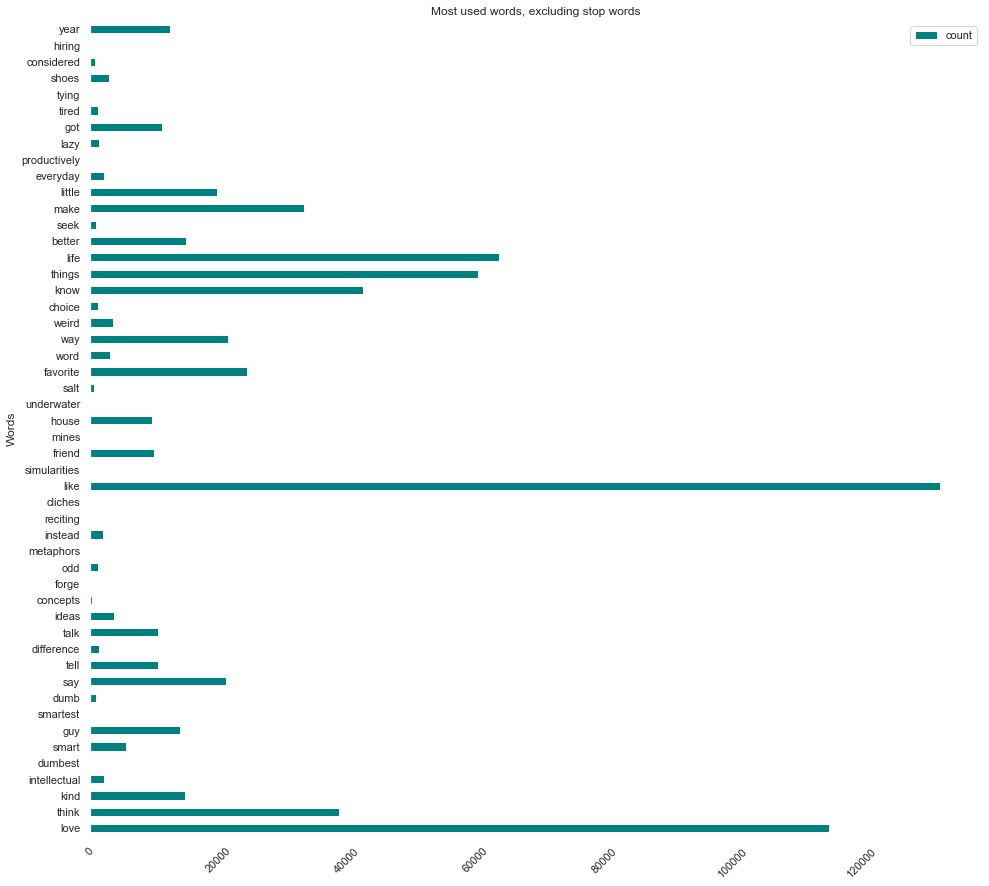

In [299]:
sns.set(rc={    
    'axes.facecolor':'white',
    'figure.facecolor':'white'})
    
plt.figure(figsize=(25,15))
fiftyword_df = word_count_df.head(50)
fiftyword_df.plot.barh(
                        figsize=(16, 15),
                        xlabel = 'Words',
                        ylabel = 'Count',
                        color = 'teal')
plt.xticks(rotation = 45)
# plt.tight_layout()
plt.title('Most used words, excluding stop words')
plt.savefig("../img/words.png",bbox_inches='tight')

In [300]:
#Combining essays columns
essays_df = cupid_df[['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']]
essays_df

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59941,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies: bourne serie...",- iphone - friends and family - internet - bay...,"aside from work, how to improve my home.",out enjoying friendly conversation over dinner.,please let me think about this more.,we have similar interests.
59944,"""all i have in this world are my balls and my ...","following my dreams... ""you got a dream... you...",listening,it used to be the hair until i mowed it off bu...,where to begin musically: right now i listen t...,"music, family, friends, a basketball, hoop, so...",what can i do to make someone chuckle....,what i would do on any other day. everydays a ...,i like walking around in other people's house ...,you are interested and interesting...


In [301]:
essay_0 = essays_df['essay0']
essay_0.iloc[0]

"about me:  i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.  about you:  you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind, and tele